## Ridge regression

In [15]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#### Declare some visual functions

In [16]:
def plot_actual_vs_predicted(X_validation, y_actual, y_pred, feature, xlabel, ylabel):
    """
    Draw a scatter plot comparing actual and predicted values for a specific feature.

    Parameters:
    X_validation (pd.DataFrame): Input data containing the feature to be plotted.
    y_actual (array-like): Actual value.
    y_pred (array-like): Predicted value.
    feature (str): Column name in X_validation to compare.
    xlabel (str): Label for the X-axis (name of the feature displayed on the chart).
    ylabel (str): Label for the Y-axis (e.g. Price, Area, ...).
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(X_validation[feature], y_actual, c='r', marker='o', label="Actual values", alpha=0.5) 
    plt.scatter(X_validation[feature], y_pred, c='b', marker='s', label="Predicted values", alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f"Scatter Plot of Actual vs Predicted {ylabel} per {xlabel}")
    plt.show()

#### Select feature

##### Read data

- Training set

In [17]:
df = pd.read_csv("TransformedData.csv")
df.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Price,1 Part Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.399917,4.006730,10.099505,2.236068,0.932769,4,6,8.0,-2.310335,1,0,0,0,0
1,10.400602,4.003590,10.000000,2.236068,0.086461,4,5,6.0,-2.252332,1,1,0,0,1
2,10.398891,4.009621,10.000000,2.236068,0.086461,4,5,4.0,-2.252332,0,1,0,0,1
3,10.399521,4.008289,8.660254,2.236068,-1.324053,4,6,4.0,-2.231861,0,0,0,0,1
4,10.400602,3.996527,12.369317,2.236068,2.907489,1,1,5.0,-2.139739,1,0,0,1,0


##### Input variables

- Training set

In [18]:
x = df.drop(columns=["Price", "Legal Status"])
x.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,House Direction,1 Part Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.399917,4.006730,10.099505,2.236068,0.932769,4,8.0,1,0,0,0,0
1,10.400602,4.003590,10.000000,2.236068,0.086461,4,6.0,1,1,0,0,1
2,10.398891,4.009621,10.000000,2.236068,0.086461,4,4.0,0,1,0,0,1
3,10.399521,4.008289,8.660254,2.236068,-1.324053,4,4.0,0,0,0,0,1
4,10.400602,3.996527,12.369317,2.236068,2.907489,1,5.0,1,0,0,1,0


##### Target variables

- Training set

In [19]:
y = df[['Price']]
y.head()

,Price
0,-2.310335
1,-2.252332
2,-2.252332
3,-2.231861
4,-2.139739


##### Divide into 2 training sets and validation sets

 - Split data

In [20]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=554)
print(X_train.shape, X_validation.shape)
print(y_train.shape, y_validation.shape)

(2012, 12) (503, 12)
(2012, 1) (503, 1)


#### Select Alpha coefficient

In [21]:
alpha_range = np.arange(0.05, 1, 0.05)
models = {}

def _regression(alpha, X_train, y_train, X_validation, y_validation, models: dict):
    dict_models = {}
    rid_regr = Ridge(alpha=alpha)
    rid_regr.fit(X_train, y_train)
    y_pred = rid_regr.predict(X_validation)
    MSE = np.mean((y_validation-y_pred)**2)
    dict_models["MSE"] = MSE
    dict_models["model"] = rid_regr
    model_name = "ridge_" + str(alpha)
    models[model_name] = dict_models
    return models

for alpha in alpha_range:
  models = _regression(round(alpha, 2), X_train, y_train, X_validation, y_validation, models)

# Print out the model with the best alpha coefficient (smallest MSE)
i = 0
for k, v in models.items():
  if i==0:
    best_model = k
    mse = models[k]["MSE"]
  if models[k]["MSE"] < mse:
    best_model = k
  print("model {}, MSE: {}".format(k, models[k]["MSE"]))
  i+=1

print("-----------------------------------------")
print("Best models: {}, MSE: {}".format(best_model, models[best_model]["MSE"]))


model ridge_0.05, MSE: 0.7793662219705058
model ridge_0.1, MSE: 0.8051276741153193
model ridge_0.15, MSE: 0.8152871675582645
model ridge_0.2, MSE: 0.8207788741614293
model ridge_0.25, MSE: 0.8242301854517513
model ridge_0.3, MSE: 0.8266029400051166
model ridge_0.35, MSE: 0.8283350609759429
model ridge_0.4, MSE: 0.8296551573683031
model ridge_0.45, MSE: 0.830694436593731
model ridge_0.5, MSE: 0.8315336605720608
model ridge_0.55, MSE: 0.8322252949014445
model ridge_0.6, MSE: 0.8328049177638868
model ridge_0.65, MSE: 0.8332975154878147
model ridge_0.7, MSE: 0.8337211547450253
model ridge_0.75, MSE: 0.8340892248374371
model ridge_0.8, MSE: 0.8344118605064169
model ridge_0.85, MSE: 0.8346968748228283
model ridge_0.9, MSE: 0.8349503883976162
model ridge_0.95, MSE: 0.8351772643688806
-----------------------------------------
Best models: ridge_0.05, MSE: 0.7793662219705058


*So with Alpha 0.95 will give the most optimal model*

#### Model training

##### 4.1 Create a Ridge Regression model object from the linear_model library and train it with input and target variables

In [22]:
ridge_regression = Ridge(alpha=0.05)
ridge_regression.fit(X_train, y_train)


Ridge(alpha=0.05)

##### Real estate price prediction

- Prediction on validation set

In [23]:
y_pred_validation = ridge_regression.predict(X_validation)
y_pred_validation

array([[ 4.89250835e-02],
       [ 4.11170073e-02],
       [-9.23691303e-01],
       [ 3.75453787e-01],
       [-1.22613582e-01],
       [-6.01088702e-02],
       [ 2.02521259e-01],
       [ 2.40037014e-01],
       [ 1.20152552e-01],
       [ 5.44530611e-02],
       [ 9.38215987e-02],
       [-1.38298967e-01],
       [ 2.00759190e-01],
       [ 1.25948821e-01],
       [ 1.72269990e-01],
       [ 1.53641220e-01],
       [ 1.68156473e-01],
       [-1.02977297e-01],
       [ 7.20208294e-02],
       [-1.75146047e-01],
       [ 1.90327802e-01],
       [ 2.40750393e-01],
       [ 3.92332815e-02],
       [ 1.83399115e-01],
       [ 1.82704026e-01],
       [ 2.33984600e-03],
       [ 4.32704107e-02],
       [-7.13385202e-02],
       [-8.93471475e-01],
       [ 2.14684519e-01],
       [-8.48408974e-01],
       [ 1.89711323e-01],
       [-2.38247515e-01],
       [-5.37939923e-03],
       [-2.11480468e-02],
       [ 1.54306741e-01],
       [ 1.03848155e-01],
       [ 8.09809371e-02],
       [-1.6

- On the train set

In [24]:
y_pred_train = ridge_regression.predict(X_train)
y_pred_train

array([[ 0.17193732],
       [-0.02390182],
       [ 0.02362478],
       ...,
       [ 0.22560097],
       [ 0.10775739],
       [ 0.00754   ]])

##### Model evaluation based on MSE and R-squared

- Review on Train

In [25]:
# Calculate MSE
mse_ridge_train = mean_squared_error(y_train, y_pred_train)

# Calculate R-squared
r2_ridge_train = r2_score(y_train, y_pred_train)

# Calculate MAPE
n = len(y_train)
mape = (1/n) * np.sum((np.abs((y_pred_train - y_train) / y)) * 100, axis=0)

print("Train Set:")
print("Mean Squared Error (MSE) of Ridge Model:", mse_ridge_train)
print("R-squared of Ridge Model:", r2_ridge_train * 100)
print("MAPE of Ridge Model:", mape)

Train Set:
Mean Squared Error (MSE) of Ridge Model: 0.8250599032673954
R-squared of Ridge Model: 18.401693638879458
MAPE of Ridge Model: Price    510.860831
dtype: float64


- Evaluation on the Validation set

In [26]:
# Calculate MSE
mse_ridge = mean_squared_error(y_validation, y_pred_validation)

# Calculate R-squared
r2_ridge = r2_score(y_validation, y_pred_validation)

# Calculate MAPE
n = len(y_validation)
mape = (1/n) * np.sum((np.abs((y_pred_validation - y_validation) / y)) * 100, axis=0)

print("Validation Set:")
print("Mean Squared Error (MSE) of Ridge Model:", mse_ridge)
print("R-squared of Ridge Model:", r2_ridge * 100)
print("MAPE of Ridge Model:", mape)

Validation Set:
Mean Squared Error (MSE) of Ridge Model: 0.7793662219705058
R-squared of Ridge Model: 18.43246726467185
MAPE of Ridge Model: Price    700.066058
dtype: float64


#### Visualization of the *Price* characteristic difference between the initial value and the predicted value

- Training set

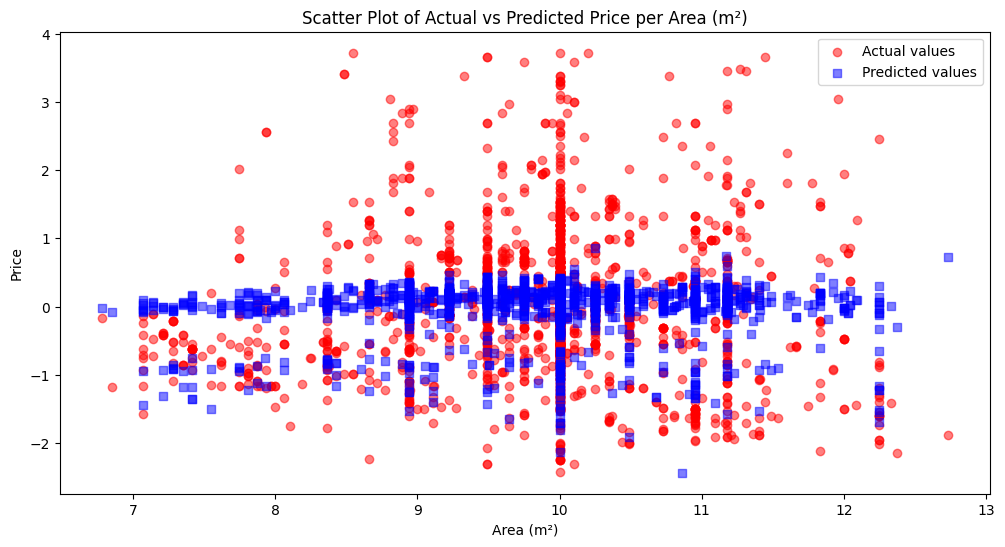

In [27]:
plot_actual_vs_predicted(X_train, y_train, y_pred_train, "Area (m²)", "Area (m²)", "Price")

- Validation set 

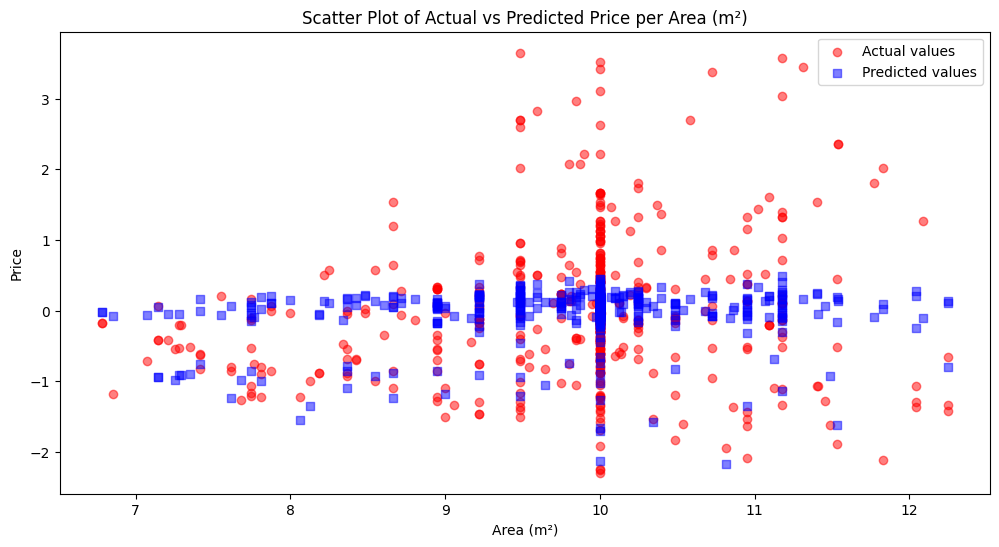

In [28]:
plot_actual_vs_predicted(X_validation, y_validation, y_pred_validation, "Area (m²)", "Area (m²)", "Price")

#### Conclusion

##### Advantages
<li>Provides a more stable solution than conventional Linear Regression by minimizing the magnitude of the coefficients, which improves accuracy and reduces the risk of overfitting</li>
<li>Maintains flexibility so that the model can adapt to new data</li>

##### Disadvantages
<li>More complex than Linear Regression</li>
<li>Not stable because changing random_state values ​​can cause model performance fluctuations</li>